In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
mag_min=18
mag_max=29.2 # this is should be determined from Sextractor catalog

re_min=0.301
re_max=99.9

n_min=0.201
n_max=8.99

q_min=0.001
q_max=1

In [3]:
data=fits.open('output_catalogue.fits')[1].data
id=data['NUMBER']
mag=data['MAG_GALFIT_BAND']
magsex=data['MAG_BEST']
re=data['RE_GALFIT_BAND']
n=data['N_GALFIT_BAND']
q=data['Q_GALFIT_BAND']
pa=data['PA_GALFIT_BAND']
goodfit=(mag>mag_min)&(mag<mag_max)&(re>re_min)&(re<re_max)&(n>n_min)&(n<n_max)&(q>q_min)&(q<=q_max)&((mag-magsex)<5.0)&((mag-magsex)>(-5.0)) # the index of good fit sample


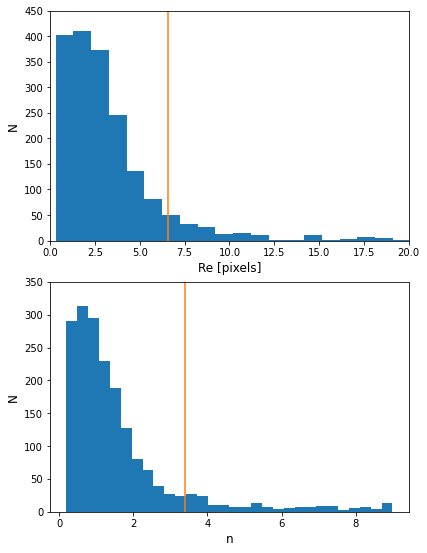

In [4]:
fig,ax=plt.subplots(figsize=(6,8))
ax1=plt.subplot(211)
data=fits.open('output_catalogue.fits')[1].data
plt.hist(re[goodfit],bins=100)
plt.plot([np.percentile(re[goodfit],90),np.percentile(re[goodfit],90)],[0,450])
plt.ylabel('N',fontsize=12)
plt.xlabel('Re [pixels]',fontsize=12)
plt.xlim(0,20)
plt.ylim(0,450)

ax2=plt.subplot(212)
plt.hist(n[goodfit],bins=30)
plt.plot([np.percentile(n[goodfit],90),np.percentile(n[goodfit],90)],[0,350])
plt.ylabel('N',fontsize=12)
plt.xlabel('n',fontsize=12)
plt.ylim(0,350)

plt.subplots_adjust(left=0.12,right=0.95,top=0.95,bottom=0.08,wspace=0.06,hspace=0.18)
plt.savefig('re_n_hist.jpg',dpi=150)